# HR - People Analytics Project

### Solving HR Analytics and gathering information from the data.
<p>The data is from Kaggle:</p> 
<p><u>User:</u> <i>PAVANSUBHASH</i></p>
<p><u>Title:</u> <i>IBM HR Analytics Employee Attrition & Performance</i></p>
<u>Link:</u> https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?utm_medium=social&utm_campaign=kaggle-dataset-share&utm_source=linkedin

<p>The purpose of the project is to practice my analytical skills with a real HR database, using my knowledge in <b><i>Python, Excel, and Power BI</i></b>. Machine learning techniques will be applied where possible.</p>

<p>I will analyze the data to obtain valuable insights that allow actions to be taken related to HR. Also, an attempt will be made to create a comparative of the metrics, by creating data to simulate the passing years.</p>

<p>I will work with the file <b><i>'WA_Fn-UseC_-HR-Employee-Attrition'</i></b>, downloaded from the Kaggle database.</p>

<p>Hypotheses will be raised, which must be confirmed or rejected by the data. The necessary dashboards will then be created to visualize the results of the hypotheses raised. Finally, the conclusions reached will be detailed.</p>


### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np

# This is to ignore warnings. Was a recommendation from my friend Manuel.
import warnings
warnings.filterwarnings('ignore')


### 2. Importing our data file

<p>It's time to import our file <b><i>'WA_Fn-UseC_-HR-Employee-Attrition'</i></b> to work with it. This is a .csv file. First, I will explore the data, clean it, and remove those values that are not necessary to our analysis</p>

In [2]:
df_rawdata = pd.read_csv('WA_Fn_UseC_HR_Employee_Attrition.csv')
df_rawdata.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df_rawdata.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### 3 Cleaning the data

<p>For the data cleaning process I will delete the columns 'EmployeeCount', 'Over18', and 'StockOptionLevel', but before doing this, first I will make a copy of the database df_rawdata, so if I need something I can go back to the original database.</p>

##### 3.1 Copy the database

In [5]:
# The copy will be called df_padb from dataframe peopleanalyticsdatabase
df_padb = df_rawdata.copy()
df_padb.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Checking for missing values
missing_values = df_padb.isnull().sum()
print('Number of missing values: ', missing_values)

Number of missing values:  Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurren

In [7]:
# Deleting columns 'EmployeeCount', 'Over18', and 'StockOptionLevel'
df_padb.drop('EmployeeCount', axis='columns' , inplace=True)
df_padb.drop('Over18', axis='columns' , inplace=True)
df_padb.drop('StockOptionLevel', axis='columns' , inplace=True)
df_padb.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

##### 3.2 Creating an ID Column

<p>I will create an ID for each employee using a <u>two letter code</u> for the 'Department' with a <u>four random number</u> combination</p>

In [8]:
# First let's take a look at how many departments we have in the database
departments = df_padb['Department'].value_counts()
print(departments)

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


<p>I will create a function to create the two-letter code from the <i>'Department'</i> column. Then I will create an array with the four random numbers. With the two values, I will join them and store them into a variable, to later deploy the values into the <i>'ID'</i> column</p>

In [9]:
# Function to create the code values for the departments
def departments_code(departments):
    if 'Research & Development' in departments:
        return 'RD'
    elif 'Sales' in departments:
        return 'SL'
    else:
        return 'HR'
    
# Now is time to create our random numbers and add them to the TempID column
random_number = np.random.randint(1000, 9999, size=len(df_padb))

# Join the two values together
new_data = df_padb['Department'].apply(departments_code) + pd.Series(random_number).astype(str)

# Inserting the new ID column with the values created lately
df_padb.insert(0, 'ID', new_data, True)

df_padb.head()

,ID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,SL6028,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,3,1,80,8,0,1,6,4,0,5
1,RD4038,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,4,4,80,10,3,3,10,7,1,7
2,RD8082,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,80,7,3,3,0,0,0,0
3,RD8885,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,3,3,80,8,3,3,8,7,3,0
4,RD7425,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,...,3,4,80,6,3,3,2,2,2,2


In [10]:
df_padb['ID'].dtype



dtype('O')

##### 3.3 Replacing the code numbers from columns <i>'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', and 'WorkLifeBalance'</i>

<p>I will replace the code numbers of those columns to make it easier to work with the data and to have better insights. For this task, I will change the type of the values from integer to string, and then replace the values with their references</p>

In [11]:
# Education column
education_ref = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

df_padb['Education'] = df_padb['Education'].map(education_ref)

# 'EnvironmentSatisfaction' column
environment_satisfaction_ref = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

df_padb['EnvironmentSatisfaction'] = df_padb['EnvironmentSatisfaction'].map(environment_satisfaction_ref)

# 'JobInvolvement' column
job_involvement_ref = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

df_padb['JobInvolvement'] = df_padb['JobInvolvement'].map(job_involvement_ref)

# 'JobSatisfaction' column
job_satisfaction_ref = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

df_padb['JobSatisfaction'] = df_padb['JobSatisfaction'].map(job_satisfaction_ref)

# 'PerformanceRating' column
performance_rating_ref = {
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
}

df_padb['PerformanceRating'] = df_padb['PerformanceRating'].map(performance_rating_ref)

# 'RelationshipSatisfaction' column
relationship_satisfaction_ref = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

df_padb['RelationshipSatisfaction'] = df_padb['RelationshipSatisfaction'].map(relationship_satisfaction_ref)

# 'WorkLifeBalance' column
wlb_ref = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}

df_padb['WorkLifeBalance'] = df_padb['WorkLifeBalance'].map(wlb_ref)

df_padb.head()

,ID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,SL6028,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,...,Excellent,Low,80,8,0,Bad,6,4,0,5
1,RD4038,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,...,Outstanding,Very High,80,10,3,Better,10,7,1,7
2,RD8082,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,...,Excellent,Medium,80,7,3,Better,0,0,0,0
3,RD8885,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,...,Excellent,High,80,8,3,Better,8,7,3,0
4,RD7425,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,...,Excellent,Very High,80,6,3,Better,2,2,2,2


##### 3.4 Exportint our data into an Excel spreadsheet

<p>Now that the values are replaced by their reference and the data is cleaned. It's time to export the database into an Excel spreadsheet. In case we need it, I will create a .csv file too</p>

In [12]:
# Exporting the data to an Excel spreadsheet
df_padb.to_excel('imb_analytics_2021.xlsx', sheet_name='hr_analytics_2021', index=False)

# Exporting the data to a CSV file
df_padb.to_csv('ibm_hranalytics_2021.csv', index=False)

### 4 Working with the ISO 30414-2018

<p>Now with the data cleaned, it's time to use the ISO and start working with the data to develop HR insights</p>

##### 4.1 DIVERSITY

<p>I am going to work with what is indicated in the ISO to know how the company is made up and how diversified it is.</p>

##### 4.1.a Creating the column with the age range

<p>Before starting to work with the data, I'm going to create an age range to simplify the work and establish a better understanding of the different generations that make up our company</p>

In [13]:
# Function to create the age range
def age_range(age):
    if age >= 18 and age <= 27:
        return '18 to 27'
    elif age >= 28 and age <= 37:
        return '28 to 37'
    elif age >= 38 and age <= 47:
        return '38 to 47'
    elif age >= 48 and age <= 57:
        return '48 to 57'
    else:
        return 'more than 58'

# New data    
new_age_data = df_padb['Age'].apply(lambda x: pd.Series(age_range(x)))
# print(new_age_data)

# Inserting the new column into the dataframe
df_padb.insert(loc=df_padb.columns.get_loc('Age')+1, column='AgeRange', value=new_age_data)
df_padb.head()

,ID,Age,AgeRange,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,SL6028,41,38 to 47,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,...,Excellent,Low,80,8,0,Bad,6,4,0,5
1,RD4038,49,48 to 57,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,...,Outstanding,Very High,80,10,3,Better,10,7,1,7
2,RD8082,37,28 to 37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,...,Excellent,Medium,80,7,3,Better,0,0,0,0
3,RD8885,33,28 to 37,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,...,Excellent,High,80,8,3,Better,8,7,3,0
4,RD7425,27,18 to 27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,...,Excellent,Very High,80,6,3,Better,2,2,2,2


##### 4.1.b Analysing the data and creating the plots

<p> Now that we have the age range column, let's examine the information and extract the variables needed to make the charts that show how diversity affects our organization. I'll make a plot for each of the following: <i>gender, age range, study field, and study level</i>. This will allow us to see the range of staff diversity inside our firm.
<p> Understanding the <u>diversity of our business</u> will enable us to establish policies for upcoming hiring and to build a more diverse workplace.</p>
<p>For the plots I will use matplotlib</p>

In [14]:
import matplotlib.pyplot as plt

##### 4.1.b.1 Gender

<p>Now let's look at the <i>'Gender' column</i> and see how gender is distributed. The gender distribution will help us with future recruiting processes by providing an overview of how gender is distributed across our organization.</p>

Male      882
Female    588
Name: Gender, dtype: int64


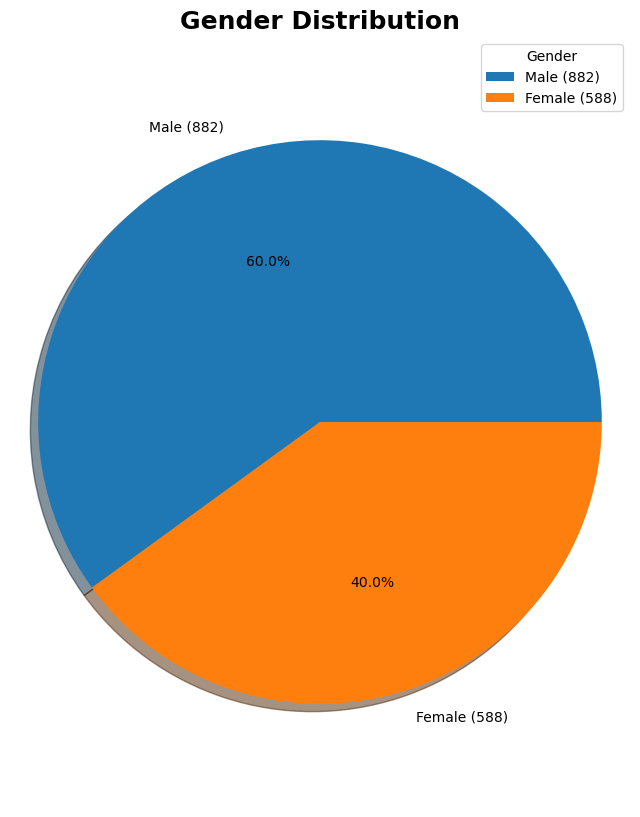

In [15]:
# Counting the gender values and storage them into a variable
gender_counts = df_padb['Gender'].value_counts()
print(gender_counts)

# Total and percentage variables to use on our charts
total_count = gender_counts.sum()
gender_percentage = (gender_counts / total_count) * 100

# labels = gender_counts.index
# Using a function to create the labels
labels = [f'{gender} ({count})' for gender, count in zip(gender_counts.index, gender_counts)]

# Chart size
fig, ax = plt.subplots(figsize=(8, 10))

# Chart generation
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%')
plt.legend(title='Gender')
ax.set_title('Gender Distribution', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

##### 4.1.b.2 Age Distribution

<p>Now let's look at the <i>'AgeRange' column</i> and see how the ages are distributed. Assess the age of our firm and its distribution structure.<p>

28 to 37        638
38 to 47        406
18 to 27        210
48 to 57        187
more than 58     29
Name: AgeRange, dtype: int64


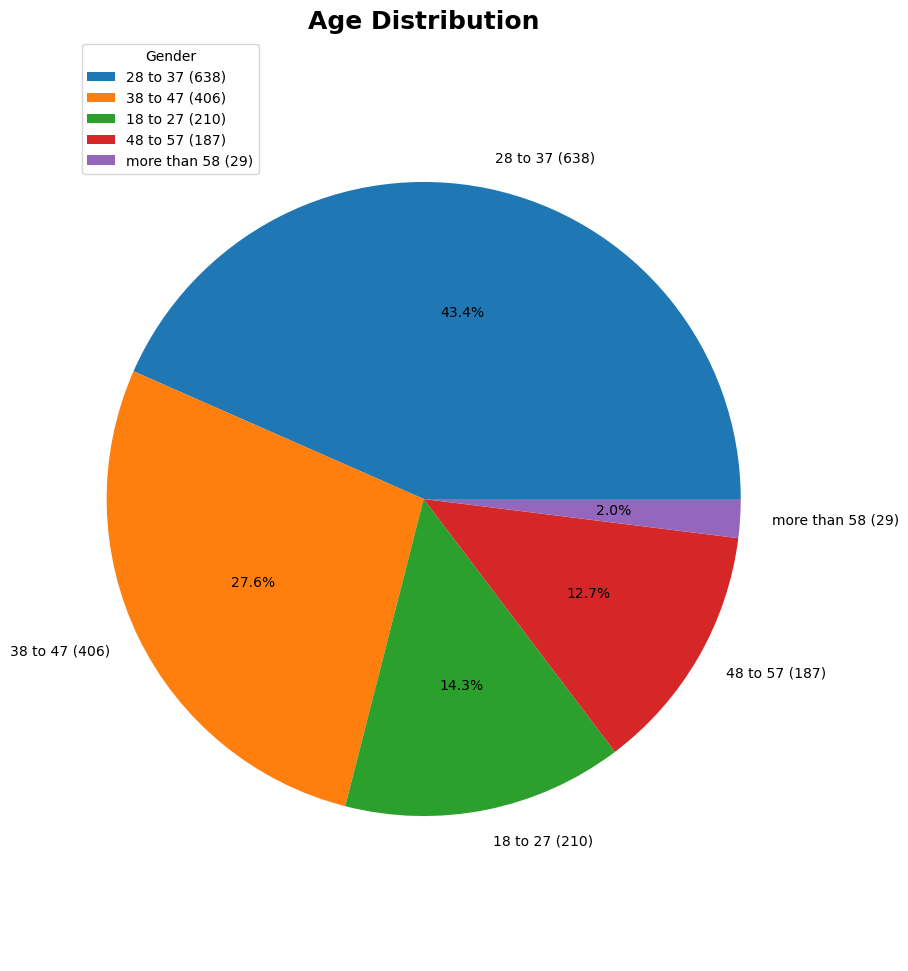

In [16]:
age_range_count = df_padb['AgeRange'].value_counts()
print(age_range_count)

total_age_count = age_range_count.sum()
age_percentage = (age_range_count / total_age_count) * 100

labels = [f'{age} ({count})' for age, count in zip(age_range_count.index, age_range_count)]

fig, ax = plt.subplots(figsize=(9, 12))


plt.pie(age_range_count, labels=labels, autopct='%1.1f%%')
plt.legend(title='Gender', loc= 'upper left')
ax.set_title('Age Distribution', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

##### 4.1.b.3 More Distributions

<p>What degree of education and training do our personnel possess? I'm curious if there is a need to support employees in enhancing their academic performance. I'll be using the columns <i>"Education" and "EducationField"</i> for this assignment.</p>

##### 4.1.b.3.a Education Distribution

Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64


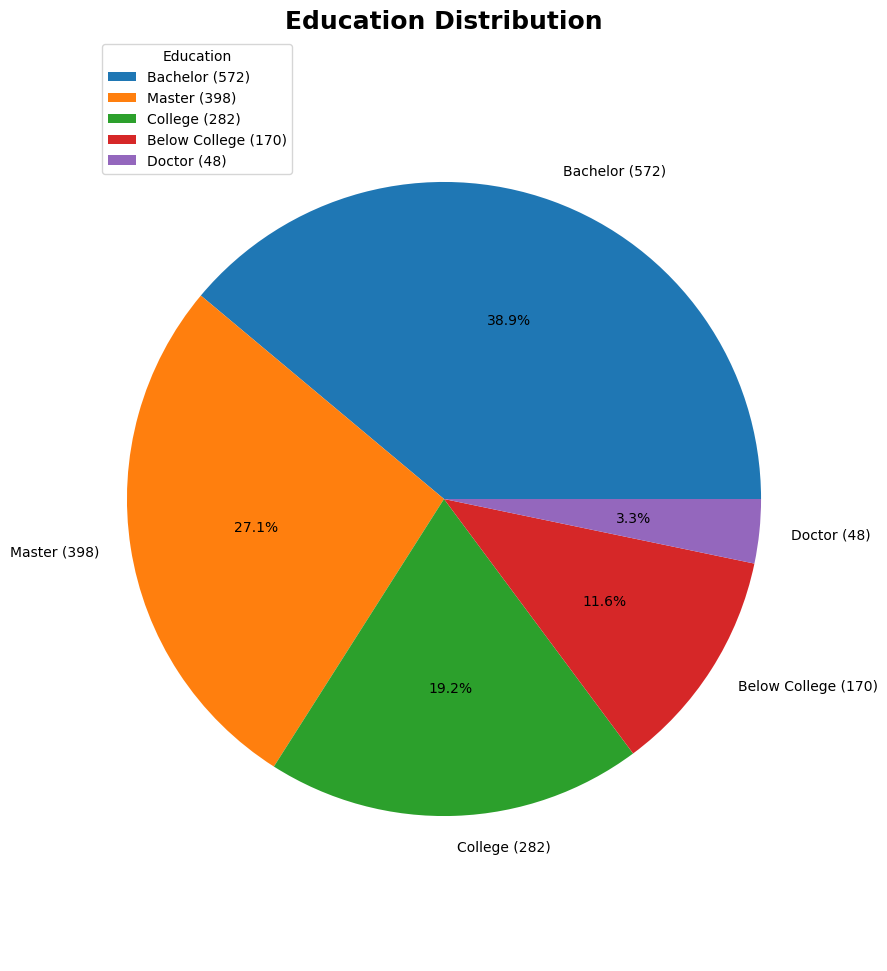

In [20]:
education_count = df_padb['Education'].value_counts()
print(education_count)

total_education_count = education_count.sum()
education_percentage = (education_count / total_education_count) * 100

labels = [f'{education} ({count})' for education, count in zip(education_count.index, education_count)]

fig, ax = plt.subplots(figsize=(9, 12))


plt.pie(education_count, labels=labels, autopct='%1.1f%%')
plt.legend(title='Education', loc= 'upper left')
ax.set_title('Education Distribution', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

##### 4.1.b.3.b Field Education Distribution

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


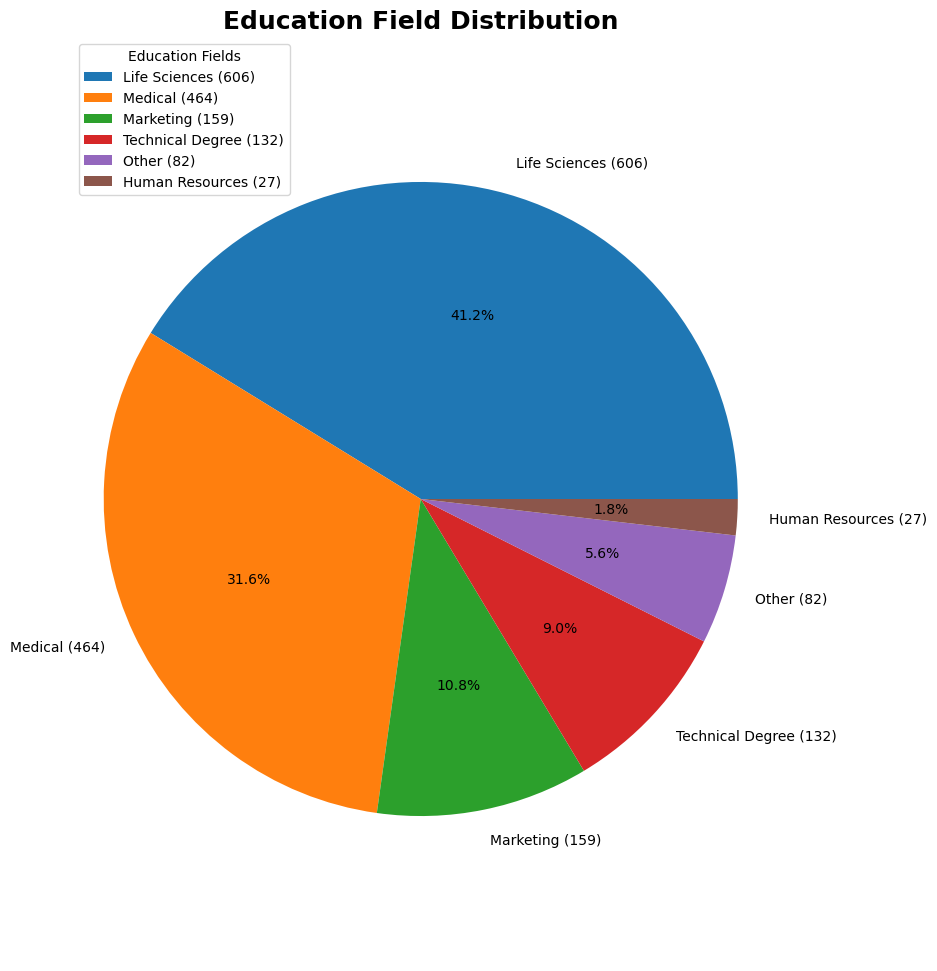

In [23]:
educationfield_count = df_padb['EducationField'].value_counts()
print(educationfield_count)

total_educationfield_count = educationfield_count.sum()
educationfield_percentage = (educationfield_count / total_educationfield_count) * 100

labels = [f'{education} ({count})' for education, count in zip(educationfield_count.index, educationfield_count)]

fig, ax = plt.subplots(figsize=(9, 12))


plt.pie(educationfield_count, labels=labels, autopct='%1.1f%%')
plt.legend(title='Education Fields', loc= 'upper left')
ax.set_title('Education Field Distribution', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

##### 4.1.c Appendix

<p>I compute certain numbers in this appendix for use in upcoming analyses. Recall that in the future, we want to <i>compare and understand how diversity evolves throughout time</i>.</p>

In [26]:
# Calculate the employees average age
age_info = df_padb['Age'].describe()
print(age_info)

age_sum = df_padb['Age'].mean().round(0)
print(age_sum)

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64
37.0


##### 4.2 JOB SATISFACTION

<p>Let's examine employee satisfaction levels across the company's different roles. Which role has the greatest or lowest degree of contentment? With this metric, we can identify those roles where satisfaction is low, discover what is causing the low levels, and design or create strategies to improve it.</p>

<p>I'll start by tallying the distribution of the satisfaction categories.</p>

Very High    459
High         442
Low          289
Medium       280
Name: JobSatisfaction, dtype: int64


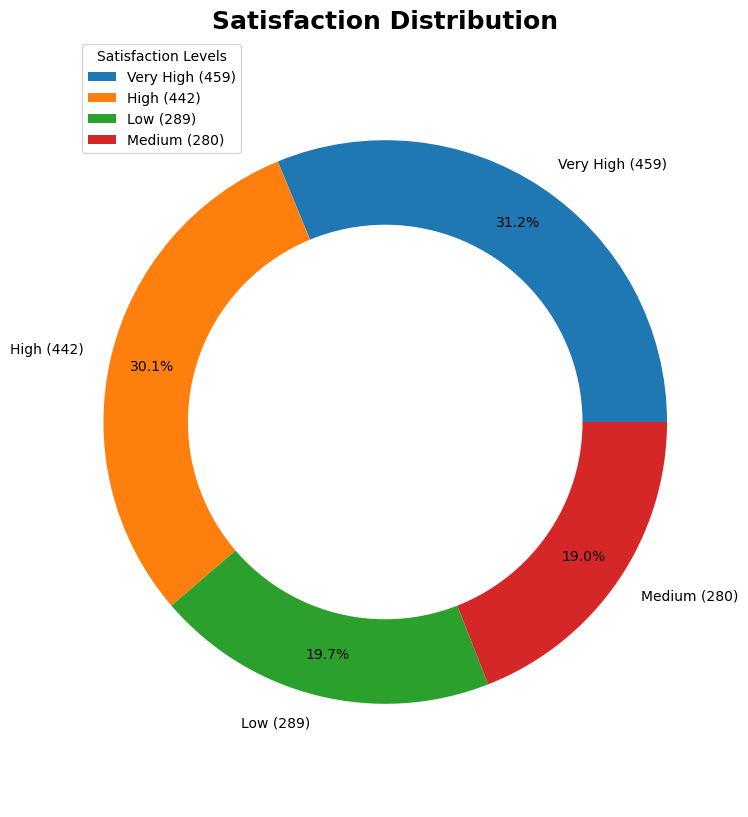

In [39]:
# Count the satisfaction categories.
job_satisfaction_count = df_padb['JobSatisfaction'].value_counts()
print(job_satisfaction_count)

job_satisfaction_total = df_padb['JobSatisfaction'].sum()

labels = [f'{jobsatisfaction} ({count})' for jobsatisfaction, count in zip(job_satisfaction_count.index, job_satisfaction_count)]

fig, ax = plt.subplots(figsize=(8, 10))

plt.pie(job_satisfaction_count, labels=labels, autopct='%1.1f%%', pctdistance=0.85)
plt.legend(title='Satisfaction Levels', loc= 'upper left')
ax.set_title('Satisfaction Distribution', fontsize=18, fontweight='bold')
plt.axis('equal')
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.show()

<p>The data shows that <b><i>19,7%</i></b> of the employees have <u>low</u> satisfaction with their job. I will identify which of the roles are not so satisfied with their job</p>

In [ ]:
# Count the roles and see how the satisfaction levels distribute whith in

In [29]:
df_total_records = len(df_padb)
print(df_total_records)

1470
